In [1]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.58 + 3.17 * 0.08 **2 /(4 * w0**2)
Up0  

2.1410957217605415

In [3]:
data = loadtxt('./HHG_0.dat' )
time, Ex, Ey, Ax, Ay, Dx, Dy = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]

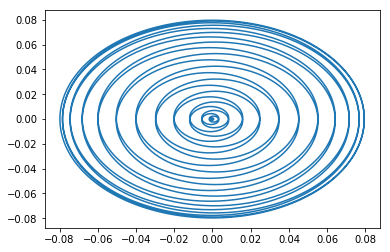

In [4]:
# plot(time, Ex)
# plot(time, Ey)
# title('$E_x \quad & \quad E_y$')
plot(Ex,Ey)
# plot(Ax,Ay)

(-500, 500)

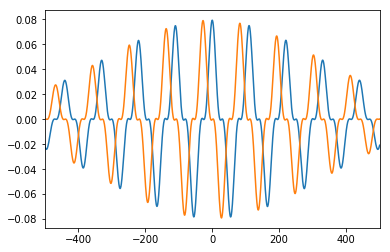

In [5]:
plot(time, Dx)
plot(time, Dy)
xlim(-500,500)

(-600, 50)

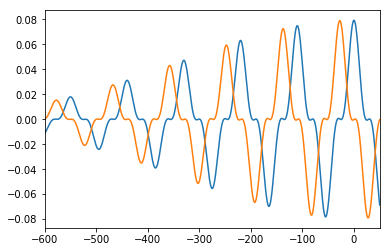

In [6]:
plot(time, Dx)
plot(time, Dy)
xlim(-600,50)

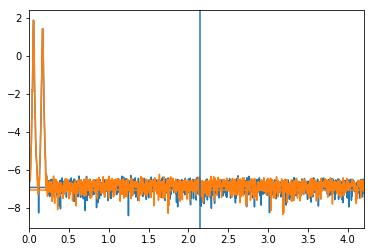

In [7]:
frex = fft.fft(2 * Dx)
frey = fft.fft(2 * Dy)
w = 2* pi* fft.fftfreq(len(time), dt)
plot(w, log10(abs(frex)))
plot(w, log10(abs(frey)))
xlim(0,4.2)
axvline(Up0)

In [48]:
mul=16*Dx.size
Dx_ext = np.pad(Dx, (mul, mul), 'constant')
Dy_ext = np.pad(Dy, (mul, mul), 'constant')
time_ext = np.pad(time,(mul,mul), 'constant')
Dx_thz = zeros(Dx.size, complex)
Dy_thz = zeros(Dy.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time)*dt))))
print(con_1,frex)
Dx_thz[0:con_1]=frex[0:con_1]
Dy_thz[0:con_1]=frey[0:con_1]
Dx_thz[(frex.size-con_2):frex.size]=frex[(frex.size-con_2):Dx.size]
Dy_thz[(frex.size-con_2):frex.size]=frey[(frex.size-con_2):Dx.size]
sx=ifft(Dx_thz)
sy=ifft(Dy_thz)

8 [-2.76874010e-08+0.00000000e+00j  2.09248084e-08+1.74059581e-08j
 -1.32238092e-07+2.80474750e-08j ... -2.06187991e-07+1.12692320e-07j
 -1.32238092e-07-2.80474750e-08j  2.09248084e-08-1.74059581e-08j]


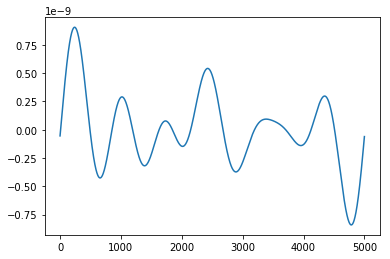

In [49]:
plot(sy)

In [50]:
Dx_1=zeros(Dx.size)
Dy_1=zeros(Dy.size)
Dx_1[Dx.size-1]=((Dx[Dx.size-1]-Dx[Dx.size-2])/dt)
Dy_1[Dy.size-1]=((Dy[Dy.size-1]-Dy[Dy.size-2])/dt)
for m in range(Dx.size-1):
    Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
    Dy_1[m]=((Dy[m+1]-Dy[m])/dt)
#
Dx_2=zeros(Dx.size)
Dy_2=zeros(Dy.size)
Dx_2[Dx.size-1]=((Dx_1[Dx.size-1]-Dx_1[Dx.size-2])/dt)
Dy_2[Dy.size-1]=((Dy_1[Dy.size-1]-Dy_1[Dy.size-2])/dt)
for n in range(Dx.size-1):
    Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
    Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)

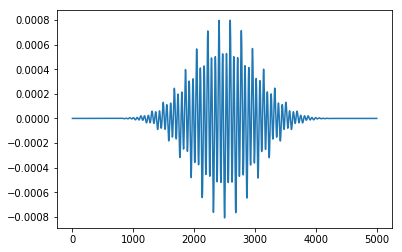

In [51]:
plot(Dx_2)

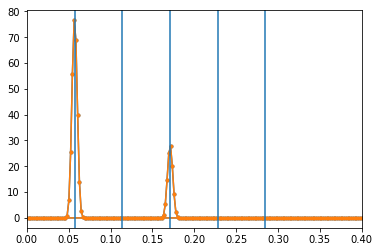

In [52]:
plot(w, (abs(frex)), '.-')
plot(w, (abs(frey)), '.-')
xlim(0,0.4)
axvline(0.057)
axvline(0.114)
axvline(0.171)
axvline(0.228)
axvline(0.285)

(77.5, 86)

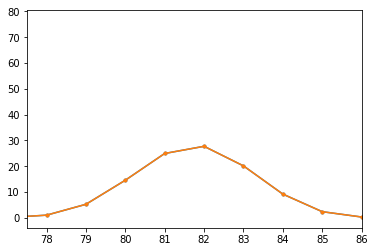

In [53]:
plot(abs(frex), '.-')
plot(abs(frey), '.-')
xlim(77.5,86)
#xlim(0,100)

$A= A_0sin^2(w\frac{t}{2nc})cos(wt)$